In [1]:
import matplotlib.pyplot as plt
import os, re, pickle
import scipy.io
from collections import defaultdict
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def nested_dict(n):
    if n == 1:
        return defaultdict(lambda: np.ndarray(0))
    else:
        return defaultdict(lambda: nested_dict(n-1))
    
color_code = {
    "DET vs FullGradCam":       "blue",
    "DET-GrpF vs FullGradCam":  "#0072BD",
    "DET-GrpE vs FullGradCam":  "cyan",
    
    "EXP vs ODAM":              "red",
    "EXP-GrpF vs ODAM":         "orange",
    "EXP-GrpE vs ODAM":         "olive",

    "PV vs FullGradCam":        "purple",
    "PV-GrpF vs FullGradCam":   "pink",
    "PV-GrpE vs FullGradCam":   "magenta",
}

tnrfont = {'fontname':'Times New Roman'}

alpha = 0.3

### Whole-Image Human Attention Maps
For the definition of Explorative vs Focused groups, see Mary's results at:
https://docs.google.com/presentation/d/1b7mX8MR4Q-D1JT0DY1LpjvM6y8iggoAdjS_4Vv8sNag/edit

In [2]:
human_attention_path = {
    "DET":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/240107_DET_excluded_resized/attention_maps',
    "DET-GrpF":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/240107_DET_excluded_resized/grp2',
    "DET-GrpE":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/240107_DET_excluded_resized/grp1',
    "EXP":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231222_EXP_excluded_cleaned_resized/attention_maps',
    "EXP-GrpF":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231222_EXP_excluded_cleaned_resized/grp2',
    "EXP-GrpE":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231222_EXP_excluded_cleaned_resized/grp1',
    "PV":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231221_PV_resized/attention_maps',
    "PV-GrpF":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231221_PV_resized/grp2',
    "PV-GrpE":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231221_PV_resized/grp1',
}

# Attention Type, Image Idex
human_attention = {
    "DET":defaultdict(),
    "DET-GrpF":defaultdict(),
    "DET-GrpE":defaultdict(),
    "EXP":defaultdict(),
    "EXP-GrpF":defaultdict(),
    "EXP-GrpE":defaultdict(),
    "PV":defaultdict(),
    "PV-GrpF":defaultdict(),
    "PV-GrpE":defaultdict(),
}

for type, path_by_type in human_attention_path.items():
    for file in os.listdir(path_by_type):
        img_idx = file.replace('_GSmo_21.mat','')
        mat = scipy.io.loadmat(os.path.join(path_by_type,file))
        human_attention[type][img_idx] = mat['output_map_norm']

In [3]:
for type, t in human_attention.items():
    print(f"{type} {len(t)}")
    for img in t:
        if img not in human_attention['DET'].keys():
            print(img)

DET 160
DET-GrpF 160
DET-GrpE 160
EXP 160
EXP-GrpF 160
EXP-GrpE 160
PV 160
PV-GrpF 160
PV-GrpE 160


In [4]:
failed_imgs = []

In [10]:
xai_saliency_path = {
    "FullGradCAM":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/xai_saliency_maps_faster/fullgradcamraw',
    "ODAM":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/xai_saliency_maps_faster/odam',
}

# Type, Category, Layer, Image
xai_saliency_maps = {
    "FullGradCAM":defaultdict(defaultdict),
    "ODAM":defaultdict(defaultdict),
}

for type, path_by_type in xai_saliency_path.items():
    for dir in os.listdir(path_by_type):
        layer_num = int(re.findall(r"F\d+",dir)[-1].replace('F',''))

        for file in os.listdir(os.path.join(path_by_type,dir)):
            if '.mat' not in file: continue
            img_idx = file.replace('-res.png.mat','')
            try:
                mat = scipy.io.loadmat(os.path.join(path_by_type,dir,file))
                if mat['masks_ndarray'].sum()==1.5 and mat['masks_ndarray'][0,0]==1 and mat['masks_ndarray'][1,1]==0.5:
                    failed_imgs.append(img_idx)
                    continue
                elif not np.any(mat['masks_ndarray']):
                    failed_imgs.append(img_idx)
                    continue
                xai_saliency_maps[type][layer_num][img_idx] = mat['masks_ndarray']
            except:
                print(f"{type}\t{layer_num}\t{file}")

In [11]:
print(set(failed_imgs))
print(len(set(failed_imgs)))

{'toaster_232348', 'toothbrush_218439', 'hair drier_239041', 'mouse_513688', 'kite_405279', 'toaster_453302', 'hair drier_178028', 'traffic light_453841', 'book_472678'}
9


In [12]:
for type, t in xai_saliency_maps.items():
        for layer, l in t.items():
                print(f"{type} Layer {layer} {len(l)}")
                for img in l:
                        if img not in human_attention['DET']: print(img)

FullGradCAM Layer 10 160
FullGradCAM Layer 11 160
FullGradCAM Layer 12 160
FullGradCAM Layer 13 160
FullGradCAM Layer 14 160
FullGradCAM Layer 15 160
FullGradCAM Layer 16 160
FullGradCAM Layer 17 160
FullGradCAM Layer 1 160
FullGradCAM Layer 2 160
FullGradCAM Layer 3 160
FullGradCAM Layer 4 160
FullGradCAM Layer 5 160
FullGradCAM Layer 6 160
FullGradCAM Layer 7 160
FullGradCAM Layer 8 160
FullGradCAM Layer 9 160
ODAM Layer 10 151
ODAM Layer 11 151
ODAM Layer 12 151
ODAM Layer 13 151
ODAM Layer 14 151
ODAM Layer 15 150
ODAM Layer 16 151
ODAM Layer 17 151
ODAM Layer 1 151
ODAM Layer 2 151
ODAM Layer 3 151
ODAM Layer 4 151
ODAM Layer 5 151
ODAM Layer 6 151
ODAM Layer 7 151
ODAM Layer 8 151
ODAM Layer 9 151


## Similarity Analysis

In [13]:
zero_pcc = {
    "DET vs FullGradCam":defaultdict(list),
    "DET-GrpF vs FullGradCam":defaultdict(list),
    "DET-GrpE vs FullGradCam":defaultdict(list),
    "EXP vs ODAM":defaultdict(list),
    "EXP-GrpF vs ODAM":defaultdict(list),
    "EXP-GrpE vs ODAM":defaultdict(list),
    "PV vs FullGradCam":defaultdict(list),
    "PV-GrpF vs FullGradCam":defaultdict(list),
    "PV-GrpE vs FullGradCam":defaultdict(list),
}

negative_pcc = {
    "DET vs FullGradCam":defaultdict(list),
    "DET-GrpF vs FullGradCam":defaultdict(list),
    "DET-GrpE vs FullGradCam":defaultdict(list),
    "EXP vs ODAM":defaultdict(list),
    "EXP-GrpF vs ODAM":defaultdict(list),
    "EXP-GrpE vs ODAM":defaultdict(list),
    "PV vs FullGradCam":defaultdict(list),
    "PV-GrpF vs FullGradCam":defaultdict(list),
    "PV-GrpE vs FullGradCam":defaultdict(list),
}

In [14]:
PCC_all = {
    "DET vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpF vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpE vs FullGradCam":defaultdict(defaultdict),
    "EXP vs ODAM":defaultdict(defaultdict),
    "EXP-GrpF vs ODAM":defaultdict(defaultdict),
    "EXP-GrpE vs ODAM":defaultdict(defaultdict),
    "PV vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpF vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpE vs FullGradCam":defaultdict(defaultdict),
}
RMSE_all = {
    "DET vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpF vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpE vs FullGradCam":defaultdict(defaultdict),
    "EXP vs ODAM":defaultdict(defaultdict),
    "EXP-GrpF vs ODAM":defaultdict(defaultdict),
    "EXP-GrpE vs ODAM":defaultdict(defaultdict),
    "PV vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpF vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpE vs FullGradCam":defaultdict(defaultdict),
}

for layer in range(1,18):
    for img in human_attention['DET'].keys():
        if img in failed_imgs: continue

        if img in xai_saliency_maps['FullGradCAM'][layer].keys():
            # DET vs FullGradCam
            PCC_all['DET vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET'][img].flatten())[0,1]
            RMSE_all['DET vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET'][img].flatten())
            if PCC_all['DET vs FullGradCam'][layer][img] == 0:
                zero_pcc['DET vs FullGradCam'][layer].append(img)
            elif PCC_all['DET vs FullGradCam'][layer][img] < 0:
                negative_pcc['DET vs FullGradCam'][layer].append(img)

            # DET-GrpF vs FullGradCam
            PCC_all['DET-GrpF vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpF'][img].flatten())[0,1]
            RMSE_all['DET-GrpF vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpF'][img].flatten())
            if PCC_all['DET-GrpF vs FullGradCam'][layer][img] == 0:
                zero_pcc['DET-GrpF vs FullGradCam'][layer].append(img)
            elif PCC_all['DET-GrpF vs FullGradCam'][layer][img] < 0:
                negative_pcc['DET-GrpF vs FullGradCam'][layer].append(img)

            # DET-GrpE vs FullGradCam
            PCC_all['DET-GrpE vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpE'][img].flatten())[0,1]
            RMSE_all['DET-GrpE vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpE'][img].flatten())
            if PCC_all['DET-GrpE vs FullGradCam'][layer][img] == 0:
                zero_pcc['DET-GrpE vs FullGradCam'][layer].append(img)
            elif PCC_all['DET-GrpE vs FullGradCam'][layer][img] < 0:
                negative_pcc['DET-GrpE vs FullGradCam'][layer].append(img)

            # PV vs FullGradCam
            PCC_all['PV vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV'][img].flatten())[0,1]
            RMSE_all['PV vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV'][img].flatten())
            if PCC_all['PV vs FullGradCam'][layer][img] == 0:
                zero_pcc['PV vs FullGradCam'][layer].append(img)
            elif PCC_all['PV vs FullGradCam'][layer][img] < 0:
                negative_pcc['PV vs FullGradCam'][layer].append(img)

            # PV-GrpF vs FullGradCam
            PCC_all['PV-GrpF vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpF'][img].flatten())[0,1]
            RMSE_all['PV-GrpF vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpF'][img].flatten())
            if PCC_all['PV-GrpF vs FullGradCam'][layer][img] == 0:
                zero_pcc['PV-GrpF vs FullGradCam'][layer].append(img)
            elif PCC_all['PV-GrpF vs FullGradCam'][layer][img] < 0:
                negative_pcc['PV-GrpF vs FullGradCam'][layer].append(img)

            # PV-GrpE vs FullGradCam
            PCC_all['PV-GrpE vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpE'][img].flatten())[0,1]
            RMSE_all['PV-GrpE vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpE'][img].flatten())
            if PCC_all['PV-GrpE vs FullGradCam'][layer][img] == 0:
                zero_pcc['PV-GrpE vs FullGradCam'][layer].append(img)
            elif PCC_all['PV-GrpE vs FullGradCam'][layer][img] < 0:
                negative_pcc['PV-GrpE vs FullGradCam'][layer].append(img)

        if img in xai_saliency_maps['ODAM'][layer].keys():
            # EXP vs ODAM
            PCC_all['EXP vs ODAM'][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP'][img].flatten())[0,1]
            RMSE_all['EXP vs ODAM'][layer][img] = RMSE(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP'][img].flatten())
            if PCC_all['EXP vs ODAM'][layer][img] == 0:
                zero_pcc['EXP vs ODAM'][layer].append(img)
            elif PCC_all['EXP vs ODAM'][layer][img] < 0:
                negative_pcc['EXP vs ODAM'][layer].append(img)

            # EXP-GrpF vs ODAM
            PCC_all['EXP-GrpF vs ODAM'][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpF'][img].flatten())[0,1]
            RMSE_all['EXP-GrpF vs ODAM'][layer][img] = RMSE(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpF'][img].flatten())
            if PCC_all['EXP-GrpF vs ODAM'][layer][img] == 0:
                zero_pcc['EXP-GrpF vs ODAM'][layer].append(img)
            elif PCC_all['EXP-GrpF vs ODAM'][layer][img] < 0:
                negative_pcc['EXP-GrpF vs ODAM'][layer].append(img)

            # EXP-GrpE vs ODAM
            PCC_all['EXP-GrpE vs ODAM'][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpE'][img].flatten())[0,1]
            RMSE_all['EXP-GrpE vs ODAM'][layer][img] = RMSE(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpE'][img].flatten())
            if PCC_all['EXP-GrpE vs ODAM'][layer][img] == 0:
                zero_pcc['EXP-GrpE vs ODAM'][layer].append(img)
            elif PCC_all['EXP-GrpE vs ODAM'][layer][img] < 0:
                negative_pcc['EXP-GrpE vs ODAM'][layer].append(img)


In [15]:
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    print(analysis)
    for layer in PCC_all[analysis]:
        print(f"Layer {layer}\t{len(PCC_all[analysis][layer])}")
        for img in set(failed_imgs):
            if img in PCC_all[analysis][layer]:
                print(img)

DET vs FullGradCam
Layer 1	151
Layer 2	151
Layer 3	151
Layer 4	151
Layer 5	151
Layer 6	151
Layer 7	151
Layer 8	151
Layer 9	151
Layer 10	151
Layer 11	151
Layer 12	151
Layer 13	151
Layer 14	151
Layer 15	151
Layer 16	151
Layer 17	151
EXP vs ODAM
Layer 1	151
Layer 2	151
Layer 3	151
Layer 4	151
Layer 5	151
Layer 6	151
Layer 7	151
Layer 8	151
Layer 9	151
Layer 10	151
Layer 11	151
Layer 12	151
Layer 13	151
Layer 14	151
Layer 15	150
Layer 16	151
Layer 17	151
PV vs FullGradCam
Layer 1	151
Layer 2	151
Layer 3	151
Layer 4	151
Layer 5	151
Layer 6	151
Layer 7	151
Layer 8	151
Layer 9	151
Layer 10	151
Layer 11	151
Layer 12	151
Layer 13	151
Layer 14	151
Layer 15	151
Layer 16	151
Layer 17	151


In [16]:
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    print(analysis)
    zero_pcc_imgs = []
    negative_pcc_imgs = []
    for layer in range(1,18):
        zero_pcc_imgs += zero_pcc[analysis][layer]
        negative_pcc_imgs += negative_pcc[analysis][layer]
    print(len(set(zero_pcc_imgs)))
    print(set(zero_pcc_imgs))
    print(len(set(negative_pcc_imgs)))
    print(set(negative_pcc_imgs))

DET vs FullGradCam
0
set()
18
{'bus_106048', 'banana_290619', 'orange_386277', 'bench_310072', 'bus_226154', 'person_562243', 'vase_521282', 'microwave_207538', 'fire hydrant_344909', 'dining table_385029', 'dining table_480122', 'sheep_278353', 'skateboard_229553', 'refrigerator_498463', 'wine glass_146489', 'bed_491757', 'suitcase_350019', 'parking meter_333956'}
EXP vs ODAM
0
set()
7
{'vase_521282', 'dining table_385029', 'dining table_480122', 'sheep_278353', 'refrigerator_498463', 'bed_491757', 'bench_310072'}
PV vs FullGradCam
0
set()
43
{'potted plant_473219', 'couch_29596', 'broccoli_61658', 'sports ball_22935', 'dining table_480122', 'apple_562059', 'sheep_278353', 'microwave_91615', 'bed_491757', 'keyboard_66635', 'mouse_68765', 'suitcase_350019', 'bench_350607', 'bench_310072', 'baseball bat_129945', 'banana_290619', 'car_310072', 'fork_243626', 'baseball glove_162415', 'parking meter_333956', 'scissors_324715', 'oven_802', 'potted plant_407614', 'skateboard_229553', 'wine g

In [17]:
for layer in range(1,18):
    for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
        print(analysis)
        arr = np.asarray(list(PCC_all[analysis][layer].values()))
        max_idx = arr.argmax()
        max_value = arr[max_idx]
        min_idx = np.where(arr>0, arr, np.inf).argmin()
        min_value = arr[min_idx]
        print(f"Layer {layer}:\t{max_value} {min_value}")

DET vs FullGradCam
Layer 1:	0.5481023999586653 0.04679038993824672
EXP vs ODAM
Layer 1:	0.5354098317328723 0.024733353735554336
PV vs FullGradCam
Layer 1:	0.5391918098964178 0.0002847368694132036
DET vs FullGradCam
Layer 2:	0.4610688922759816 0.03697291962395312
EXP vs ODAM
Layer 2:	0.47134855829504263 0.025656780381159955
PV vs FullGradCam
Layer 2:	0.467960099305782 0.006126723698534344
DET vs FullGradCam
Layer 3:	0.3752328318163533 0.02221648679367458
EXP vs ODAM
Layer 3:	0.39867069274693495 0.024038150500299164
PV vs FullGradCam
Layer 3:	0.3323547341832587 0.0005676145368007569
DET vs FullGradCam
Layer 4:	0.5377877971342195 0.05199066163229023
EXP vs ODAM
Layer 4:	0.5360722419504018 0.04168691542230686
PV vs FullGradCam
Layer 4:	0.5294532804498919 0.002047358611131584
DET vs FullGradCam
Layer 5:	0.5831574848748111 0.0486837851671881
EXP vs ODAM
Layer 5:	0.5808883660673232 0.042334987168563216
PV vs FullGradCam
Layer 5:	0.5086630894156132 0.004683904326898975
DET vs FullGradCam
Layer

In [18]:
pickle.dump(PCC_all, open('/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_PCC_all.pickle','wb'))
pickle.dump(RMSE_all, open('/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_RMSE_all.pickle','wb'))

In [9]:
PCC_all = pickle.load(open('/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_PCC_all.pickle','rb'))
RMSE_all = pickle.load(open('/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_RMSE_all.pickle','rb'))

In [19]:
PCC_all['DET vs FullGradCam'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [10]:
PCC_layer_mean = defaultdict()
RMSE_layer_mean = defaultdict()

for analysis in PCC_all.keys():
    PCC_layer_mean[analysis] = pd.DataFrame.from_dict(PCC_all[analysis]).mean(axis=0)
    RMSE_layer_mean[analysis] = pd.DataFrame.from_dict(RMSE_all[analysis]).mean(axis=0)

## Paired-t Test
Grouped by Backbone vs Neck
Over images

In [3]:
p_values = defaultdict()

neck_pcc_all = defaultdict(lambda: defaultdict(list))
backbone_pcc_all = defaultdict(lambda: defaultdict(list))
neck_pcc = defaultdict(list)
backbone_pcc = defaultdict(list)
for analysis, d1 in PCC_all.items():
    print()
    print(analysis)
    for layer, d2 in d1.items():
        for img, pcc in d2.items():
            if layer in range(9,18):
                backbone_pcc_all[analysis][img].append(pcc)
            elif layer in range(5,9):
                neck_pcc_all[analysis][img].append(pcc)

    for img in backbone_pcc_all[analysis].keys():
        backbone_pcc[analysis].append(np.average(backbone_pcc_all[analysis][img]))
        neck_pcc[analysis].append(np.average(neck_pcc_all[analysis][img]))

    result = scipy.stats.ttest_rel(neck_pcc[analysis], backbone_pcc[analysis])
    print(f"t({len(PCC_all[analysis][12]-1)})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Backbone: M={np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Neck: M={np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")

    p_values[analysis] = float(np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k'))


DET vs FullGradCam
t(144)=7.12, p=0.0000000000488
Backbone: M=0.298, std=0.0817
Neck: M=0.362, std=0.115

DET-GrpF vs FullGradCam
t(144)=6.17, p=0.00000000658
Backbone: M=0.285, std=0.0807
Neck: M=0.341, std=0.118

DET-GrpE vs FullGradCam
t(144)=8.11, p=0.000000000000205
Backbone: M=0.299, std=0.0831
Neck: M=0.368, std=0.112

EXP vs ODAM
t(144)=1.97, p=0.0504
Backbone: M=0.276, std=0.0963
Neck: M=0.292, std=0.138

EXP-GrpF vs ODAM
t(144)=2.07, p=0.0403
Backbone: M=0.262, std=0.0993
Neck: M=0.279, std=0.138

EXP-GrpE vs ODAM
t(144)=1.25, p=0.214
Backbone: M=0.278, std=0.09
Neck: M=0.288, std=0.137

PV vs FullGradCam
t(144)=-1.94, p=0.0539
Backbone: M=0.208, std=0.126
Neck: M=0.192, std=0.161

PV-GrpF vs FullGradCam
t(144)=-1.66, p=0.0983
Backbone: M=0.212, std=0.129
Neck: M=0.198, std=0.166

PV-GrpE vs FullGradCam
t(144)=-2.35, p=0.0202
Backbone: M=0.185, std=0.117
Neck: M=0.167, std=0.146


### two-layer paired t test

In [16]:
threshold = 0.05

focused_analysis = ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']
change_points = defaultdict(list) # list of change point index (1-based layer number before the change)
results = defaultdict(defaultdict) # result of each pair-wise comparison


for analysis in focused_analysis:
    layers = list(PCC_all[analysis].keys())
    for l in range(5,17):
        # Check: image order the same in both layers
        result = scipy.stats.ttest_rel(list(PCC_all[analysis][l].values()), list(PCC_all[analysis][l+1].values()))
        results[analysis][l] = result

        if result.pvalue <= threshold:
            change_points[analysis].append(l)


In [17]:
change_points

defaultdict(list,
            {'DET vs FullGradCam': [5, 6, 7, 8, 9, 13],
             'EXP vs ODAM': [6, 7, 8, 13],
             'PV vs FullGradCam': [7, 13]})

In [5]:
for analysis in focused_analysis:
    print(analysis)
    for l in change_points[analysis]:
        print(f"Layer {l}:\t{results[analysis][l]}")

DET vs FullGradCam
Layer 6:	TtestResult(statistic=2.8716527199329316, pvalue=0.004704869658448474, df=143)
Layer 7:	TtestResult(statistic=-5.501443017733446, pvalue=1.6895613953763507e-07, df=143)
Layer 8:	TtestResult(statistic=2.3595080077500272, pvalue=0.01965098987846499, df=143)
Layer 9:	TtestResult(statistic=5.906816521836436, pvalue=2.4340179514886664e-08, df=143)
Layer 13:	TtestResult(statistic=3.8169594345793425, pvalue=0.0002005607976096131, df=143)
EXP vs ODAM
Layer 6:	TtestResult(statistic=2.2553675621116347, pvalue=0.025628530853117722, df=143)
Layer 7:	TtestResult(statistic=-3.1678887775616014, pvalue=0.0018777363243458057, df=143)
Layer 8:	TtestResult(statistic=2.2889106409677344, pvalue=0.023549421232363105, df=143)
Layer 13:	TtestResult(statistic=3.7677876330708533, pvalue=0.0002400794341070291, df=143)
PV vs FullGradCam
Layer 7:	TtestResult(statistic=-2.0407272331765567, pvalue=0.04311763909811302, df=143)
Layer 13:	TtestResult(statistic=3.08457503440605, pvalue=0.0024

In [ ]:
p_values = defaultdict()

neck_pcc_all = defaultdict(lambda: defaultdict(list))
backbone_pcc_all = defaultdict(lambda: defaultdict(list))
neck_pcc = defaultdict(list)
backbone_pcc = defaultdict(list)
for analysis, d1 in PCC_all.items():
    print()
    print(analysis)
    for layer, d2 in d1.items():
        for img, pcc in d2.items():
            if layer in range(9,18):
                backbone_pcc_all[analysis][img].append(pcc)
            elif layer in range(5,9):
                neck_pcc_all[analysis][img].append(pcc)

    for img in backbone_pcc_all[analysis].keys():
        backbone_pcc[analysis].append(np.average(backbone_pcc_all[analysis][img]))
        neck_pcc[analysis].append(np.average(neck_pcc_all[analysis][img]))

    result = scipy.stats.ttest_rel(neck_pcc[analysis], backbone_pcc[analysis])
    print(f"t({len(PCC_all[analysis][12]-1)})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Backbone: M={np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Neck: M={np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")

    p_values[analysis] = float(np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k'))

In [75]:
p_values

defaultdict(None,
            {'DET vs FullGradCam': 1.15e-10,
             'DET-GrpF vs FullGradCam': 1.43e-08,
             'DET-GrpE vs FullGradCam': 4.77e-13,
             'EXP vs ODAM': 0.0673,
             'EXP-GrpF vs ODAM': 0.0534,
             'EXP-GrpE vs ODAM': 0.263,
             'PV vs FullGradCam': 0.0464,
             'PV-GrpF vs FullGradCam': 0.0979,
             'PV-GrpE vs FullGradCam': 0.0129})

## Plot layers

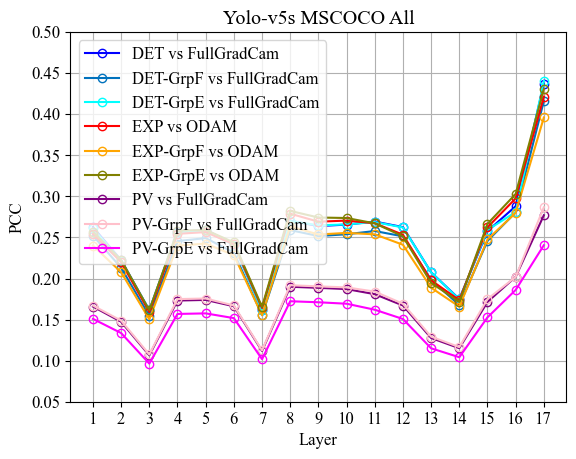

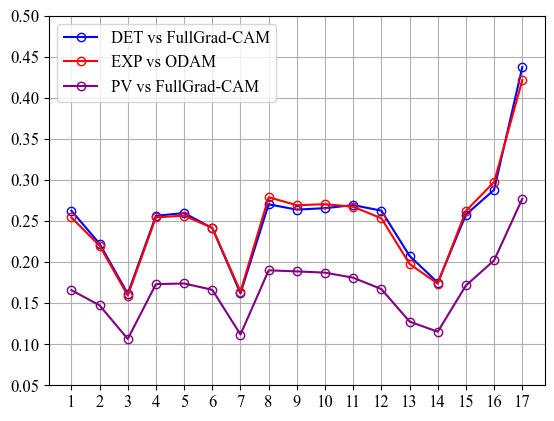

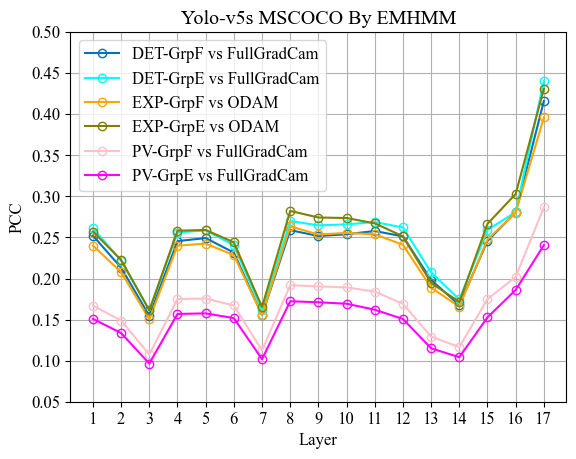

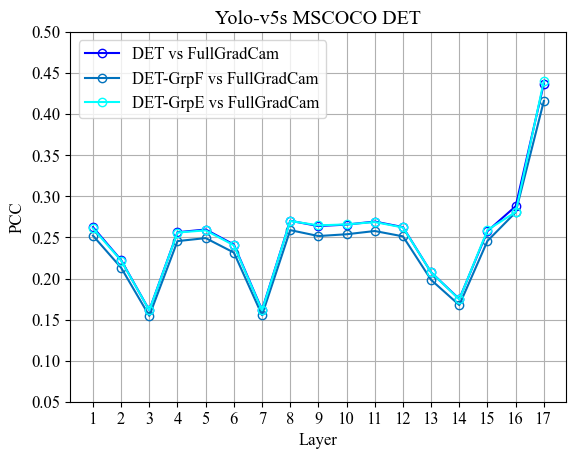

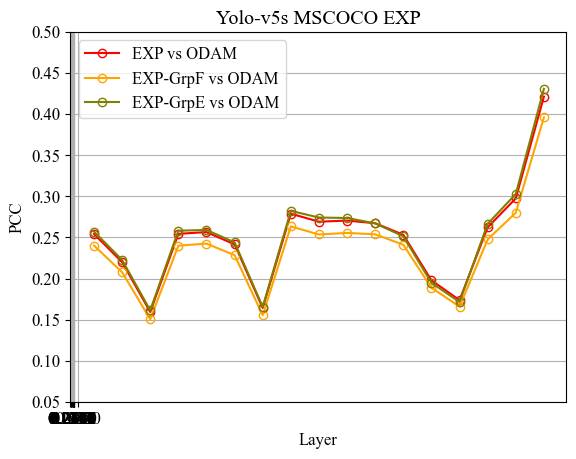

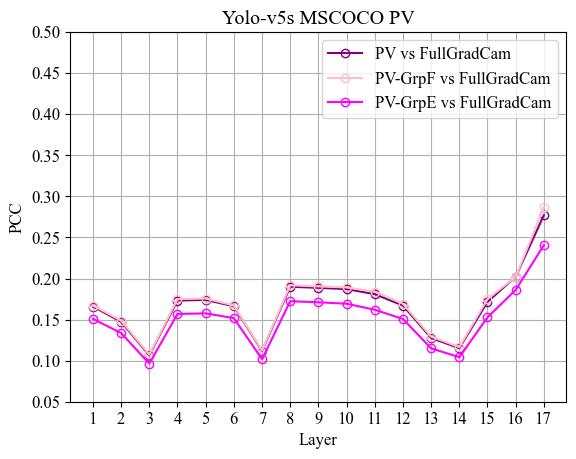

In [28]:
ylims = (0.05,0.5)

#All in one
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in PCC_all.keys():
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]), marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(np.arange(len(PCC_layer_mean[analysis]))+1)
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO All")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_all')
plt.show()

# Overall similarity
plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.grid()
# plt.xlabel('Layer')
# plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]), marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(np.arange(len(PCC_layer_mean[analysis]))+1)
plt.ylim(ylims)
# plt.title(f"Yolo-v5s MSCOCO")
plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'],fontsize=12)
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_by_tasks',
            dpi=300)
plt.show()

# Grouped by EMHMM
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['DET-GrpF vs FullGradCam','DET-GrpE vs FullGradCam','EXP-GrpF vs ODAM', 'EXP-GrpE vs ODAM', 'PV-GrpF vs FullGradCam', 'PV-GrpE vs FullGradCam']:
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]), marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(np.arange(len(PCC_layer_mean[analysis]))+1)
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO By EMHMM")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_by_emhmm')
plt.show()

# DET
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','DET-GrpF vs FullGradCam','DET-GrpE vs FullGradCam']:
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]), marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(np.arange(len(PCC_layer_mean[analysis]))+1)
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO DET")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_DET')
plt.show()

# EXP
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['EXP vs ODAM','EXP-GrpF vs ODAM','EXP-GrpE vs ODAM']:
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]), marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(PCC_layer_mean[analysis])
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO EXP")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_EXP')
plt.show()

# PV
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['PV vs FullGradCam','PV-GrpF vs FullGradCam','PV-GrpE vs FullGradCam']:
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]), marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(np.arange(len(PCC_layer_mean[analysis]))+1)
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO PV")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_PV')
plt.show()


## Bar Scatter Plot

In [6]:
focused_analysis = ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']

In [91]:
backbone_pcc_mean = [np.average(backbone_pcc[analysis]) for analysis in focused_analysis]
neck_pcc_mean = [np.average(neck_pcc[analysis]) for analysis in focused_analysis]

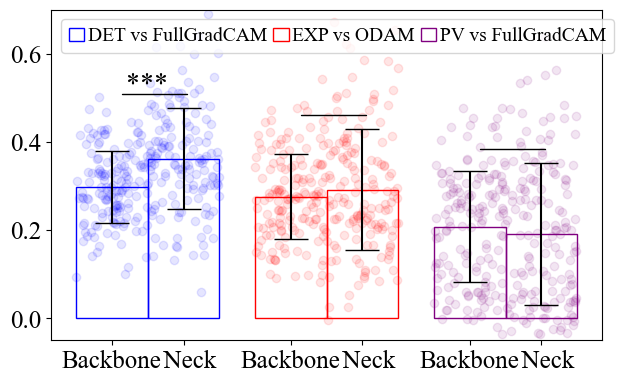

In [78]:
# Bar scatter plot
# x = np.arange(len(focused_analysis))  # the label locations
width = 0.4  # the width of the bars
np.random.seed(123)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig, ax = plt.subplots(layout='constrained')

x_labels = ['Backbone','  Neck','Backbone','  Neck','Backbone','  Neck']
x_labels_loc = []

multiplier1 = 0
offset1 = width * multiplier1

multiplier2 = 1
offset2 = width * multiplier2

# Backbone
for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset1, 
                   backbone_value,
                   yerr=float(np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                   capsize=12,
                   width=width, 
                   color=(0,0,0,0), 
                   edgecolor=color_code[analysis], 
                   label=analysis)
    x_labels_loc.append(x+offset1)
    x_labels_loc.append(x+offset2)
    # ax.bar_label(rects, padding=3)

for x, analysis in enumerate(focused_analysis):
    # Neck
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset2, 
                neck_value,
                yerr=float(np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                capsize=12,
                width=width, 
                color=(0,0,0,0), 
                edgecolor=color_code[analysis], 
                label=analysis)
    # ax.bar_label(rects, padding=3)

ax.legend(labels=['DET vs FullGradCAM','EXP vs ODAM','PV vs FullGradCAM'],
            loc='upper left', ncols=3, 
            fontsize=14,
            handletextpad=0.2,
            columnspacing=0.3,
            handlelength=0.8)
# ax.legend(handletextpad=0.5)

for x, analysis in enumerate(focused_analysis):
    ax.scatter(x + np.random.random(len(backbone_pcc[analysis])) * width - width / 2, backbone_pcc[analysis], color=color_code[analysis],alpha=0.1)
    ax.scatter(x + offset2 + np.random.random(len(neck_pcc[analysis])) * width - width / 2, neck_pcc[analysis], color=color_code[analysis],alpha=0.1)

for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    backbone_height = backbone_value + 0.9 * np.std(backbone_pcc[analysis])
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    neck_height = neck_value + 0.9 * np.std(neck_pcc[analysis])

    if p_values[analysis] < 0.001: text = "  ***"
    elif p_values[analysis] < 0.01: text = "  **"
    elif p_values[analysis] < 0.05: text = "  *"
    else: text  = ''
    # else: text = f"p = {p_values[analysis]}"
    def label_diff(i,j,text,X,Y):
        x = (X[i]+X[j])/2
        y = 1.1*max(Y[i], Y[j])
        dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                    'shrinkA':20,'shrinkB':20,'linewidth':1}
        ax.annotate(text, xy=(X[i]*8,y), zorder=10, fontsize=20)
        ax.annotate('', xy=(X[i],y*0.88), xytext=(X[j],y*0.88), arrowprops=props,ha='center')

    label_diff(0,1,text,[x+offset1*0.8,x+offset2*1.2],[backbone_height,neck_height])

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('PCC',fontsize=20, fontname='Times New Roman Bold')
# ax.set_title('Yolo-v5s MSCOCO',fontsize=20,fontname='Times New Roman Bold')
ax.set_xticks(x_labels_loc, x_labels)
ax.tick_params(labelsize=18)
ax.set_ylim(-0.05, 0.7)

ratio = 0.6
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

plt.show()
fig.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_bar_scatter_plot')

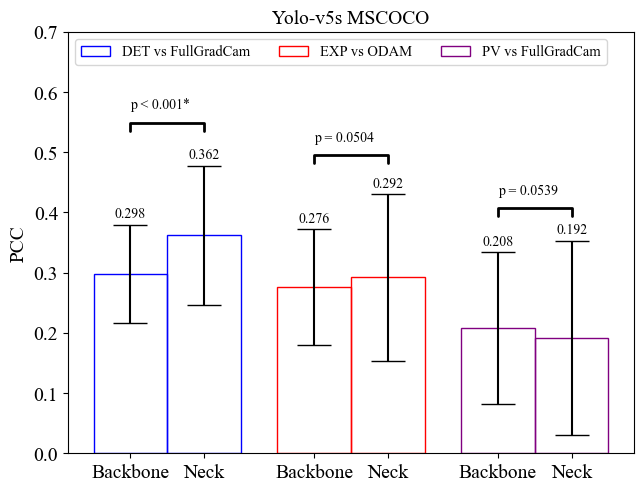

<Figure size 640x480 with 0 Axes>

In [93]:
# Bar scatter plot
# x = np.arange(len(focused_analysis))  # the label locations
width = 0.4  # the width of the bars
np.random.seed(123)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig, ax = plt.subplots(layout='constrained')

x_labels = ['Backbone','Neck','Backbone','Neck','Backbone','Neck']
x_labels_loc = []

multiplier1 = 0
offset1 = width * multiplier1

multiplier2 = 1
offset2 = width * multiplier2

# Backbone
for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset1, 
                   backbone_value,
                   yerr=float(np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                   capsize=12,
                   width=width, 
                   color=(0,0,0,0), 
                   edgecolor=color_code[analysis], 
                   label=analysis)
    x_labels_loc.append(x+offset1)
    x_labels_loc.append(x+offset2)
    ax.bar_label(rects, padding=3)

for x, analysis in enumerate(focused_analysis):
    # Neck
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset2, 
                neck_value,
                yerr=float(np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                capsize=12,
                width=width, 
                color=(0,0,0,0), 
                edgecolor=color_code[analysis], 
                label=analysis)
    ax.bar_label(rects, padding=3)

ax.legend(labels=focused_analysis, loc='upper left', ncols=3, fontsize=10.5)

# for x, analysis in enumerate(focused_analysis):
#     ax.scatter(x + np.random.random(len(backbone_pcc[analysis])) * width - width / 2, backbone_pcc[analysis], color=color_code[analysis],alpha=0.1)
#     ax.scatter(x + offset2 + np.random.random(len(neck_pcc[analysis])) * width - width / 2, neck_pcc[analysis], color=color_code[analysis],alpha=0.1)

for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    backbone_height = backbone_value + 0.9 * np.std(backbone_pcc[analysis])
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    neck_height = neck_value + 0.9 * np.std(neck_pcc[analysis])

    if p_values[analysis] < 0.001: text = "p < 0.001*"
    elif p_values[analysis] < 0.05: text = f"p = {p_values[analysis]}*"
    else: text = f"p = {p_values[analysis]}"
    def label_diff(i,j,text,X,Y):
        x = (X[i]+X[j])/2
        y = 1.1*max(Y[i], Y[j])
        dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                    'shrinkA':10,'shrinkB':10,'linewidth':2}
        ax.annotate(text, xy=(X[i],y+0.06), zorder=10)
        ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props,ha='center')

    label_diff(0,1,text,[x+offset1,x+offset2],[backbone_height,neck_height])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PCC',fontsize=14)
ax.set_title('Yolo-v5s MSCOCO',fontsize=14)
ax.set_xticks(x_labels_loc, x_labels)
ax.tick_params(labelsize=14)
ax.set_ylim(top=0.7)

plt.show()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_bar_scatter_plot')

## Clustering

In [2]:
import matplotlib.pyplot as plt
import os, re, pickle
import scipy.io, scipy.stats
from collections import defaultdict
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def nested_dict(n):
    if n == 1:
        return defaultdict(lambda: np.ndarray(0))
    else:
        return defaultdict(lambda: nested_dict(n-1))
    
color_code = {
    "DET vs FullGradCam":       "blue",
    "DET-GrpF vs FullGradCam":  "#0072BD",
    "DET-GrpE vs FullGradCam":  "cyan",
    
    "EXP vs ODAM":              "red",
    "EXP-GrpF vs ODAM":         "orange",
    "EXP-GrpE vs ODAM":         "olive",

    "PV vs FullGradCam":        "purple",
    "PV-GrpF vs FullGradCam":   "pink",
    "PV-GrpE vs FullGradCam":   "magenta",
}

tnrfont = {'fontname':'Times New Roman'}

alpha = 0.3

In [3]:
PCC_all = pickle.load(open('/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_PCC_all.pickle','rb'))
RMSE_all = pickle.load(open('/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_RMSE_all.pickle','rb'))

In [6]:
PCC_all['EXP vs ODAM'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [18]:
[PCC_all['EXP vs ODAM'][i]['handbag_383842'] for i in range(1,1)

defaultdict(None,
            {'airplane_167540': 0.3183433265195263,
             'airplane_338325': 0.3503605956478164,
             'apple_216277': 0.28072009058506764,
             'apple_562059': 0.19457333773554816,
             'backpack_177065': 0.3479942105495769,
             'backpack_370478': 0.3424434322050397,
             'banana_279769': 0.16040103751991494,
             'banana_290619': 0.05264263251752927,
             'baseball bat_129945': 0.19975153525904277,
             'baseball bat_270474': 0.21181978715571442,
             'baseball glove_162415': 0.1805930412712712,
             'baseball glove_515982': 0.24972519505006885,
             'bear_519611': 0.23668344612512446,
             'bear_521231': 0.24922065612520503,
             'bed_468245': 0.12598580248939634,
             'bed_491757': 0.11327459820165091,
             'bench_310072': 0.14299594433871954,
             'bench_350607': 0.19729058446994716,
             'bicycle_203317': 0.21542729602862

In [4]:
focused_analysis = ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']
dfs = {}
PCC_mean = {}

# reverse layer numbering
for analysis in focused_analysis:
    df = pd.DataFrame.from_dict(PCC_all[analysis])

    dfs[analysis] = df.T
    PCC_mean[analysis] = df.T.mean(axis=1)

In [8]:
for analysis in focused_analysis:
    dfs[analysis].to_csv(f"/mnt/h/jinhan/xai/results/mscoco/faster_rcnn/mscoco_PCC_{analysis.replace(' ','_')}.csv",index=False)

In [6]:
dfs_normalized_by_img = {}
dfs_normalized_by_layer = {}
dfs_melted = {}
dfs_normalized_melted = {}
dfs_normalized_by_img_melted = {}
dfs_normalized_by_layer_melted = {}

for analysis in focused_analysis:
    dfs_melted[analysis] = pd.melt(dfs[analysis],ignore_index=False)

    df = dfs[analysis]
    dfs_normalized_by_layer[analysis] = (df-df.min())/(df.max()-df.min())
    dfs_normalized_by_layer_melted[analysis] = pd.melt(dfs_normalized_by_layer[analysis],ignore_index=False).reset_index().rename(columns={'variable':'img','index':'layer'})

    df = dfs[analysis].T
    dfs_normalized_by_img[analysis] = (df-df.min())/(df.max()-df.min()).T
    dfs_normalized_by_img_melted[analysis] = pd.melt(dfs_normalized_by_img[analysis],ignore_index=False).reset_index().rename(columns={'variable':'layer','index':'img'})


In [5]:
import logging
def init_logger(filename, debug=False):
    level = logging.DEBUG if debug else logging.INFO
    logger = logging.getLogger()
    handler = logging.FileHandler(filename=filename)
    formatter = logging.Formatter(
        "%(asctime)s %(name)s %(lineno)s [%(levelname)s] %(message)s",
        datefmt='%Y/%m/%d %H:%M:%S'
    )

    handler.setFormatter(formatter)
    logger.addHandler(handler)
    logger.setLevel(level)
    return logger

from collections import Counter

# Renumber cluster idx for better visualization
# turn [1,1,0,4,0,2,1] into [0,0,1,2,1,3,0]
def relabel_clusters(arr):
    counter = Counter(arr)
    return [list(counter.keys()).index(num) for num in arr]

In [6]:
cluster_labels = [
"o",
"v",
"s",
# "*",
"X",
"d",
"p",
"^",
"<",
">",
"D",
"P",
"8",
"h",
]

def find_high_sim_layers(df, labels):
    labels = np.array(labels)
    layers = np.asarray(df.index)
    k = len(set(labels))
    max_k = 0

    cluster_mean = {}

    max = 0
    max_layers = {}
    for k in set(labels):
        layers = np.asarray(df.index)[labels == k]
        cluster_mean[k] = df.loc[list(layers)].mean().mean()
        if cluster_mean[k] > max: 
            max = cluster_mean[k]
            max_layers = layers
            max_k = k
    return max_layers, max_k

#### Hierarchical Clustering

##### Dendrogram

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import time, pickle
import itertools
from itertools import chain

hyperparameters = {
'n_clusters': [None],
'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
'linkage': ['ward', 'complete', 'average', 'single'],
}
keys, values = zip(*hyperparameters.items())
param_grid = [(idx, dict(zip(keys, v))) for idx, v in enumerate(itertools.product(*values))]
print(len(param_grid))

20


In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Failed to fit DET vs FullGradCam	4	{'n_clusters': None, 'metric': 'l1', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit DET vs FullGradCam	8	{'n_clusters': None, 'metric': 'l2', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit DET vs FullGradCam	12	{'n_clusters': None, 'metric': 'manhattan', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit DET vs FullGradCam	16	{'n_clusters': None, 'metric': 'cosine', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit EXP vs ODAM	4	{'n_clusters': None, 'metric': 'l1', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit EXP vs ODAM	8	{'n_clusters': None, 'metric': 'l2', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit EXP vs ODAM	12	{'n_clusters': None, 'metric': 'manhattan', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit EXP vs ODAM	16	{'n_clusters': None, 'metric': 'cosine', 'linkage': 'ward', 'distance_threshold': 0}
Failed to fit PV vs FullGradCam	4	{'n_clusters': None, 'metric': 'l1', 'li

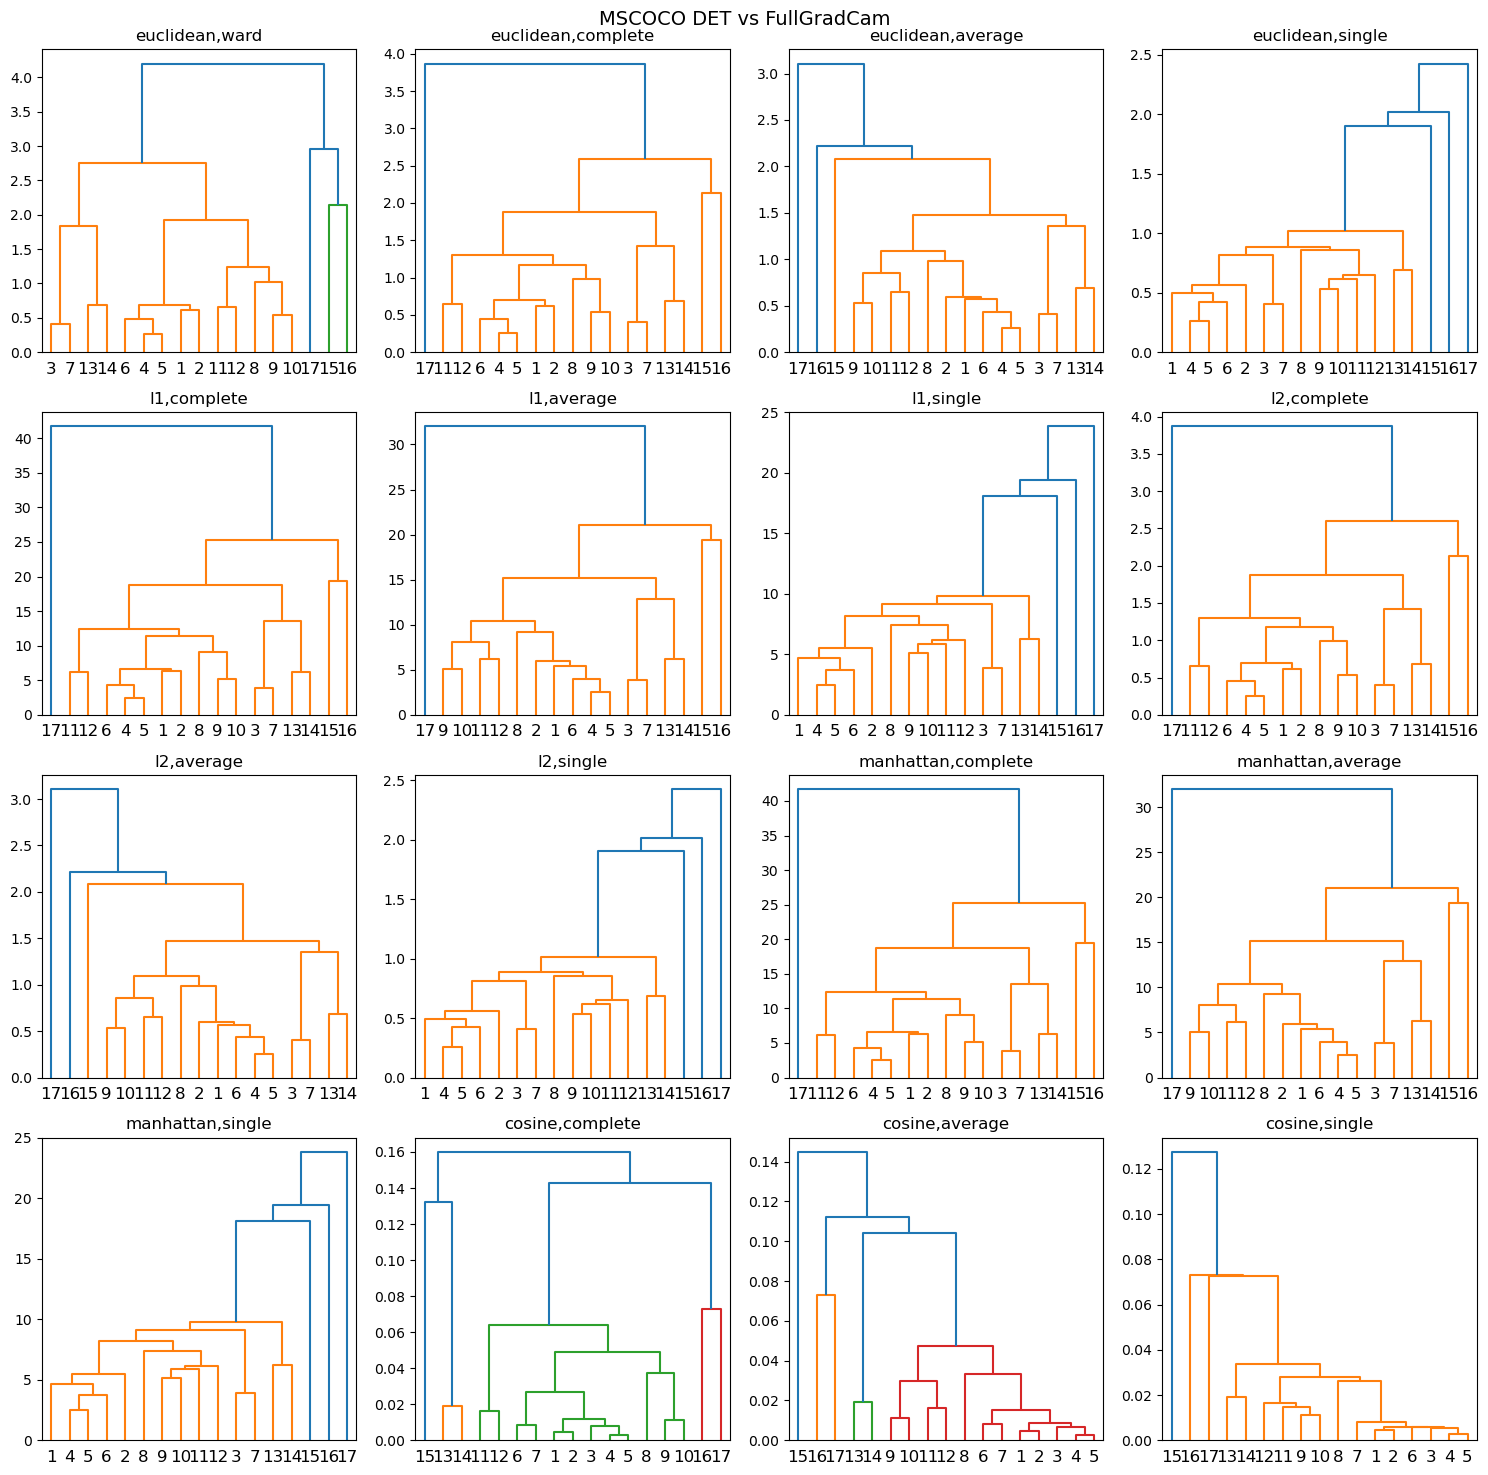

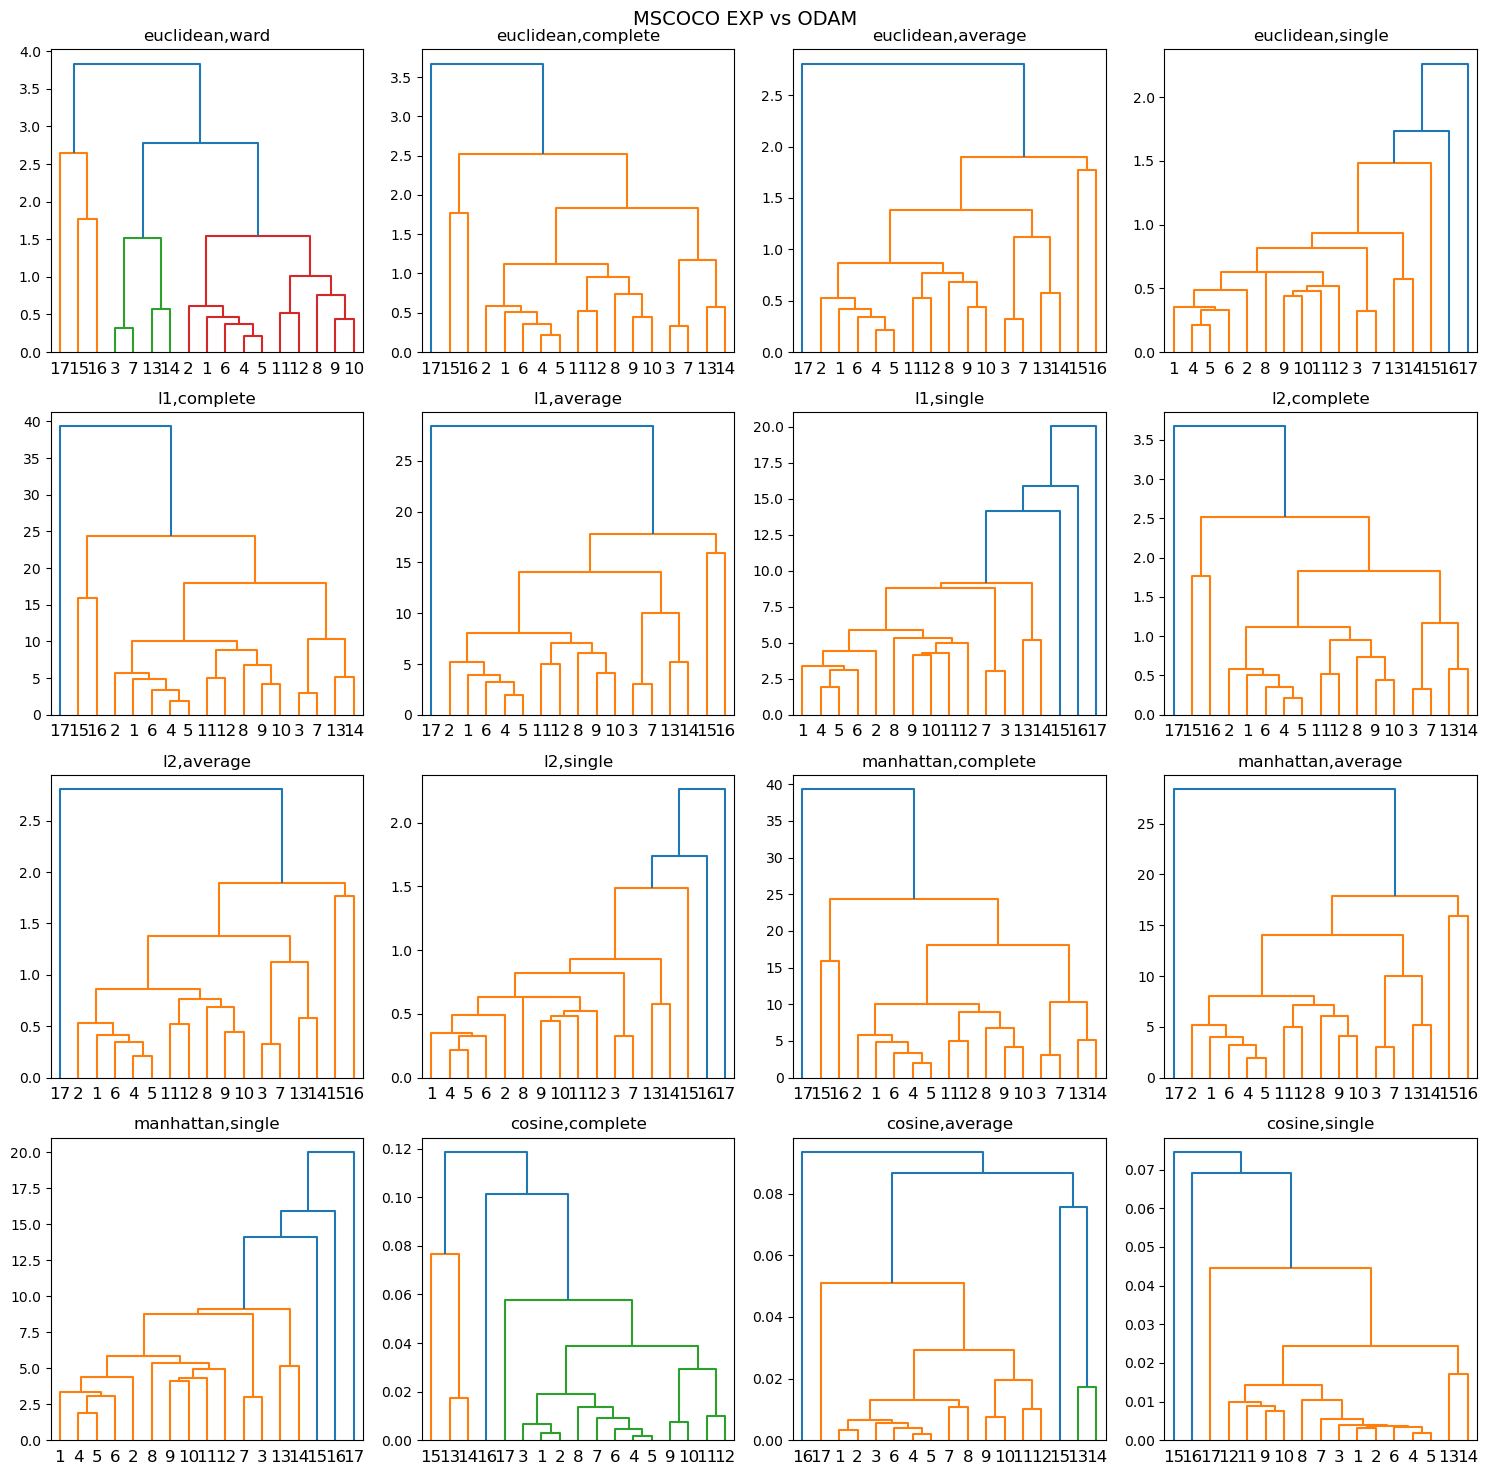

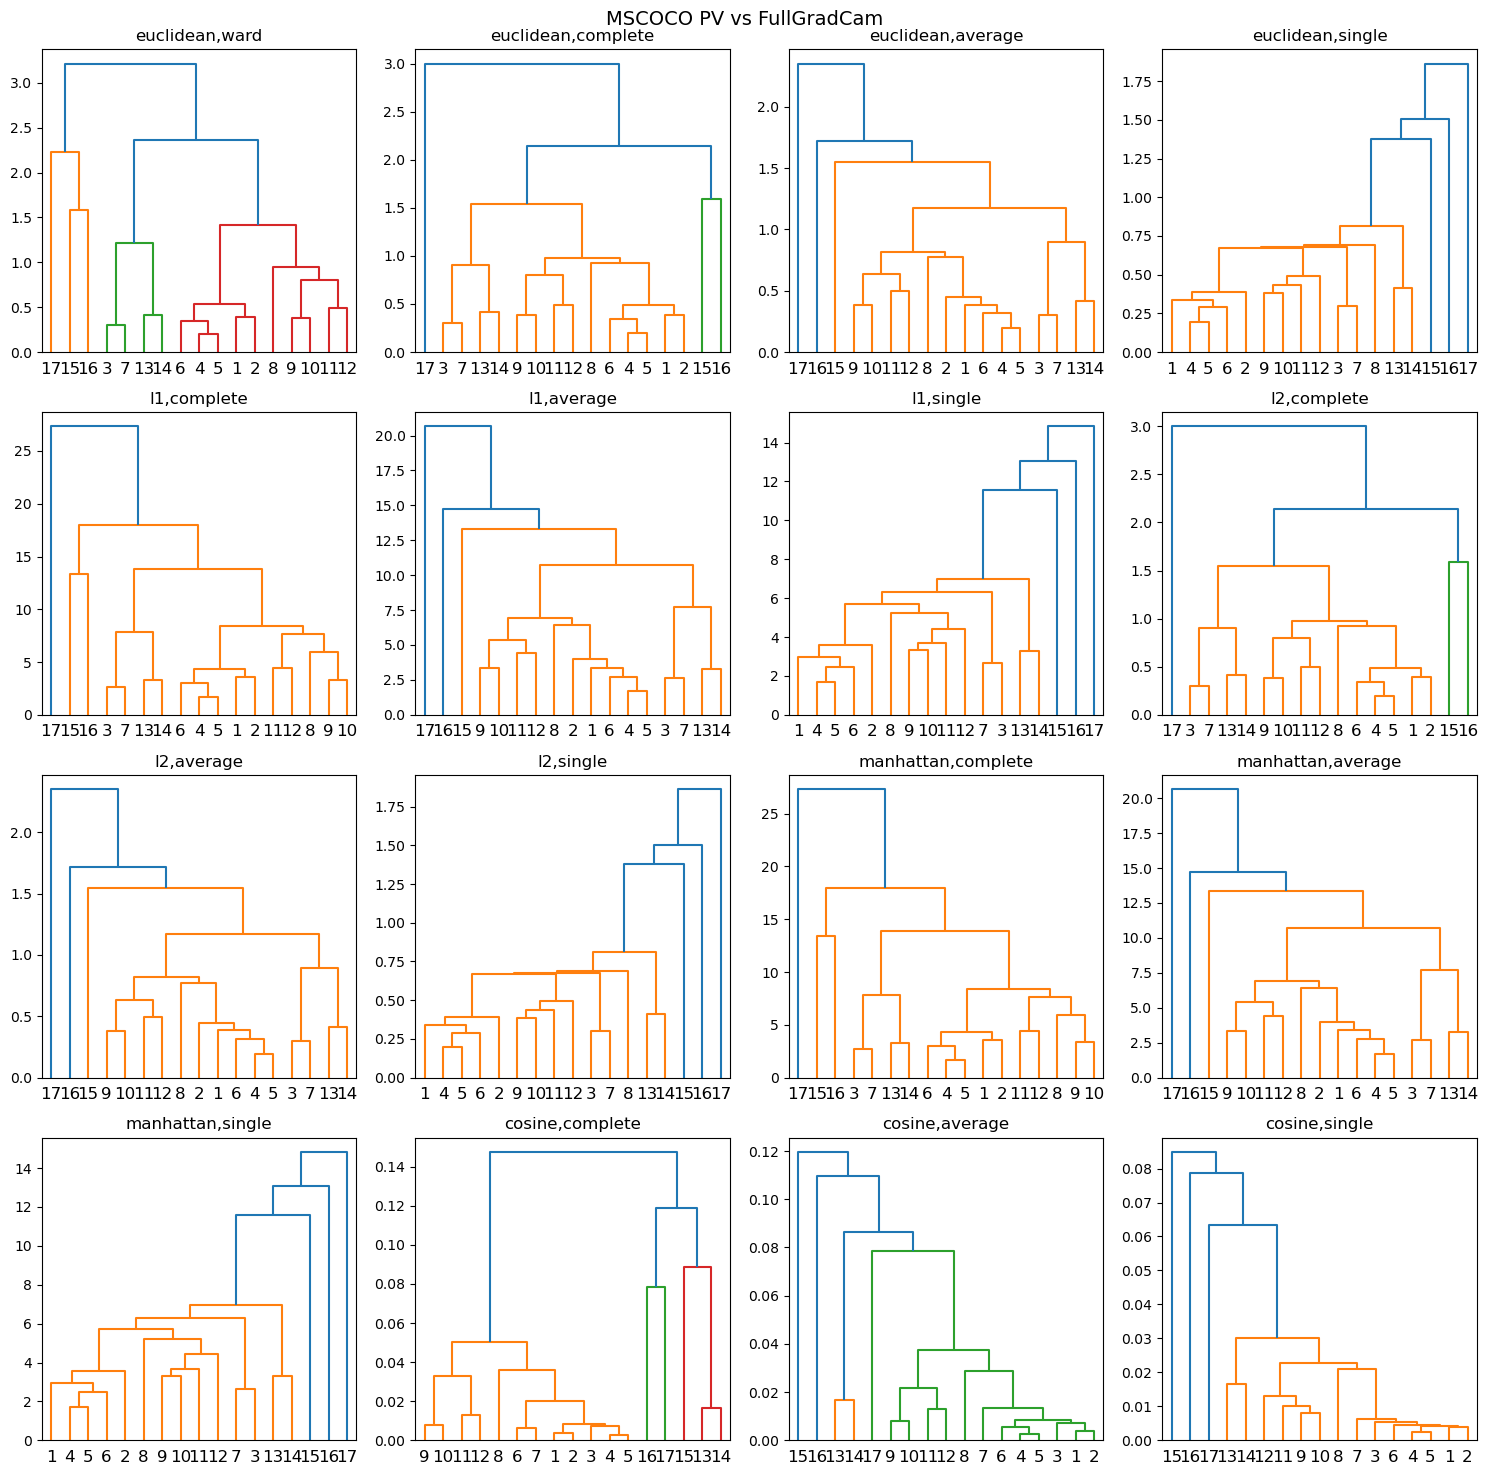

In [19]:
import time, sys

sys.tracebacklimit = 0

def fit_model(ax, analysis, idx, params):

    start = time.time()

    # analysis = 'EXP vs ODAM'
    # data = np.reshape(dfs[analysis].mean(axis=1),(-1, 1))
    data = dfs[analysis].drop(columns=['handbag_383842']) #TODO: nan

    if not params['n_clusters']:
        params['distance_threshold'] = 0 # make sure we compute the full tree

    try:

        model = AgglomerativeClustering(compute_distances=True,
                                        **params
                                        )
        labels = model.fit_predict(data)
        plot_dendrogram(model, ax=ax,truncate_mode="level", labels=np.arange(1,18))
        ax.set_title(f"{params['metric']},{params['linkage']}")

        end = time.time()

        res = [{"analysis":analysis,
                **params,
                "labels":labels,
                "distances":model.distances_,
                "time(s)":end-start}]

        return res

    except Exception:
        print(f"Failed to fit {analysis}\t{idx}\t{str(params)}")

        end = time.time()

        return None

for analysis in focused_analysis:
    fig, axs = plt.subplots(nrows=4, ncols=4,figsize=[15,15])
    idx = 0
    for params in param_grid:
        res = fit_model(axs[int(idx/4)][int(idx%4)],analysis,params[0],params[1])
        if res != None: idx += 1
    fig.suptitle(f"MSCOCO {analysis}",fontsize=14)
    plt.tight_layout()
    plt.draw()

##### Membership & Stats Analysis

In [7]:
membership = {
    'DET vs FullGradCam' : [(3,7,13,14,6,4,5,1,2,11,12,8,9,10),(17,-1),(15,16)], 
    'EXP vs ODAM' : [(2,1,6,4,5,11,12,8,9,10),(3,7,13,14),(17,15,16)], 
    'PV vs FullGradCam' : [(2,1,6,4,5,11,12,8,9,10),(3,7,13,14),(17,15,16)]
}

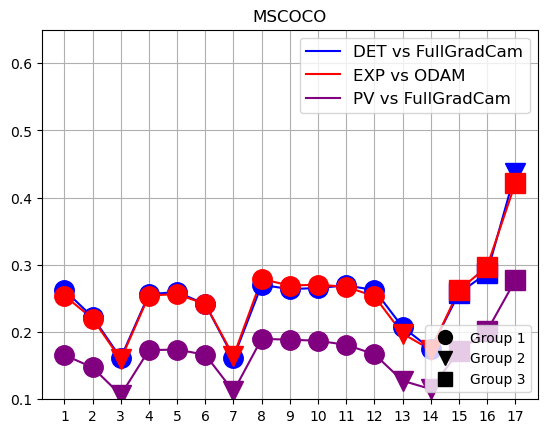

In [11]:
import matplotlib.lines as mlines
# Overall similarity
plt.grid()
ax = plt.gca()
# plt.xlabel('Layer')
# plt.ylabel('PCC')
ylims = [0.1,0.65]
for analysis in focused_analysis:
    plt.plot(np.arange(len(PCC_layer_mean[analysis]))+1, list(PCC_layer_mean[analysis]),label=analysis,c=color_code[analysis])
    plt.xticks(np.arange(len(PCC_layer_mean[analysis]))+1)
    plt.ylim(ylims)
    # plt.title(f"Yolo-v5s MSCOCO")

legend1 = plt.legend(fontsize=12, loc=0)
ax.add_artist(legend1)

for analysis in focused_analysis:
    # print(labels[analysis])
    for i, group in enumerate(membership[analysis]):
        marker = cluster_labels[i]
        for l in group:
            if l==-1: continue
            plt.plot(l,PCC_mean[analysis][l],marker=marker,c=color_code[analysis],markersize=14)

    # plt.plot(PCC_mean[analysis].index[12:18].values, PCC_mean[analysis].values[12:18], marker='o',fillstyle='none',label=analysis,c=color_code[analysis],alpha=alpha)

group1_marker = mlines.Line2D([], [], color='black', marker=cluster_labels[0], linestyle='None',
                          markersize=10, label='Group 1')
group2_marker = mlines.Line2D([], [], color='black', marker=cluster_labels[1], linestyle='None',
                          markersize=10, label='Group 2')
group3_marker = mlines.Line2D([], [], color='black', marker=cluster_labels[2], linestyle='None',
                          markersize=10, label='Group 3')

legend2=plt.legend(handles=[group1_marker, group2_marker, group3_marker],loc=4)

plt.title("MSCOCO")
plt.show()


In [ ]:
dfs['EXP vs ODAM']

,airplane_167540,airplane_338325,apple_216277,apple_562059,backpack_177065,backpack_370478,banana_279769,banana_290619,baseball bat_129945,baseball bat_270474,...,bowl_578871,cell phone_396729,chair_190236,cup_226171,frisbee_139872,hot dog_400082,knife_227985,microwave_91615,remote_430286,traffic light_133087
1,0.340485,0.487745,0.422461,0.171120,0.345772,0.489412,0.213011,0.069959,0.205886,0.171349,...,0.165028,0.222524,0.453958,0.200256,0.121407,0.284014,0.114572,0.273989,0.244733,0.241762
2,0.407831,0.474527,0.476211,0.197438,0.136220,0.471005,0.201719,0.080534,0.219500,0.221749,...,0.135587,0.167514,0.497294,0.136587,0.180190,0.268800,0.089916,0.294652,0.186271,0.267908
3,0.502018,0.305354,0.390188,0.087370,0.223438,0.412194,0.218753,0.100916,0.230968,0.224781,...,0.088556,0.159146,0.473274,0.168371,0.113323,0.336483,0.106201,0.241494,0.190192,0.298068
4,0.313285,0.451642,0.441561,0.185085,0.149686,0.465566,0.103395,0.065046,0.229736,0.264747,...,0.163333,0.244337,0.663750,0.192314,0.206019,0.355452,0.090651,0.276423,0.292294,0.213033
5,0.289255,0.454263,0.326232,0.127552,0.308027,0.462258,0.126068,0.088343,0.231117,0.267446,...,0.165616,0.185246,0.781867,0.328204,0.212099,0.314308,0.127145,0.328691,0.324099,0.150176
6,0.215859,0.280370,0.350547,0.211686,0.280022,0.621589,0.195192,0.079066,0.135005,0.244733,...,0.270232,0.290181,0.413188,0.228508,0.149321,0.311913,0.117375,0.280837,0.219277,0.124110
7,0.152519,0.410919,0.593986,0.150996,0.470812,0.573490,0.228368,0.128925,0.225542,0.248054,...,0.208053,0.262150,0.260175,0.162156,0.065278,0.177999,0.130981,0.363994,0.225177,0.047461
8,0.500999,0.519226,0.341682,0.160106,0.490370,0.700802,0.165831,0.158943,0.285866,0.254422,...,0.009443,0.280813,0.176864,0.197226,0.134161,0.224033,0.069122,0.164955,0.120590,0.209653
9,0.754912,0.479844,0.346407,0.291272,0.219814,0.679257,0.245526,0.115642,0.267524,0.130083,...,0.175610,0.435229,0.627197,0.299018,0.145760,0.444887,0.038791,0.302417,0.204523,0.226387
10,0.785727,0.544251,0.327291,0.291201,0.684599,0.658434,0.231632,0.109364,0.274061,0.222599,...,0.173914,0.453582,0.619191,0.302816,0.152604,0.436053,0.114152,0.274310,0.196383,0.207739


In [ ]:
def print_ttest(result, df, groups, data):
    print(f"t({df})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Group {groups[0]}:\n M={np.format_float_positional(np.average(data[0]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(data[0]),precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Group {groups[1]}:\n M={np.format_float_positional(np.average(data[1]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(data[1]),precision=3, unique=False, fractional=False, trim='k')}")

from statsmodels.stats.anova import AnovaRM

for analysis in focused_analysis:
    data = dfs[analysis]
    groups = membership[analysis]

    df = []
    for i, group in enumerate(groups):
        for img in data.columns:
            df.append({
                'image': img,
                'group': i+1,
                'value': data.loc[sorted(group)].mean()[img]
            })

    df = pd.DataFrame(df)
    packed = [df[df['group'] == i]['value'] for i, group in enumerate(groups)]

    # paired t test
    if len(groups) == 2:
        print(f"\n{analysis} paired-t test\n")

        result = scipy.stats.ttest_rel(packed[0], packed[1])
        print_ttest(result, len(data.columns)-1, groups, packed)

    elif len(groups) == 3:
        print(f"\n{analysis} Repeated Measures ANOVA test\n")

        anova_results = AnovaRM(df, depvar='value', subject='image', within=['group']).fit()
        print(anova_results.summary())
        
        for i in range(len(groups)):
            for j in range(i+1, len(groups)):
                print(f"Group {i} vs Group {j}")
                result = scipy.stats.ttest_rel(packed[i], packed[j])
                print_ttest(result, len(data.columns)-1, (groups[i],groups[j]), (packed[i],packed[j]))
                print()

    # for jamovi
    df = df.pivot_table(index='image',columns='group',values='value').reset_index()
    df.to_csv(os.path.join('/mnt/h/jinhan/xai/results/clustering/stats/',f"COCO_{analysis.replace(' ','_')}_anova.csv"))



DET vs FullGradCam Repeated Measures ANOVA test

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
group 39.3665 2.0000 286.0000 0.0000

Group 0 vs Group 1
t(143)=-7.57, p=0.00000000000427
Group (4, 5, 3, 1, 2, 8, 6, 7):
 M=0.286, std=0.0842
Group (9, 10):
 M=0.406, std=0.19

Group 0 vs Group 2
t(143)=-5.74, p=0.0000000544
Group (4, 5, 3, 1, 2, 8, 6, 7):
 M=0.286, std=0.0842
Group (13, 11, 12):
 M=0.344, std=0.111

Group 1 vs Group 2
t(143)=4.43, p=0.0000185
Group (9, 10):
 M=0.406, std=0.19
Group (13, 11, 12):
 M=0.344, std=0.111


EXP vs ODAM Repeated Measures ANOVA test

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
group  6.1198 2.0000 286.0000 0.0025

Group 0 vs Group 1
t(143)=-2.86, p=0.00492
Group (4, 5, 3, 1, 2, 8, 6, 7):
 M=0.273, std=0.0959
Group (9, 10):
 M=0.31, std=0.18

Group 0 vs Group 2
t(143)=-1.14, p=0.255
Group (4, 5, 3, 1, 2, 8, 6, 7):
 M=0.273, std=0.0959
Group (13, 11, 1

In [ ]:
df[df['image']=='airplane_167540']

,image,group,value
0,airplane_167540,0,0.342790
144,airplane_167540,1,0.660825


In [ ]:
df.pivot_table(index='image',columns='group',values='value').reset_index()

group,image,0,1
0,airplane_167540,0.342790,0.660825
1,airplane_338325,0.446452,0.459889
2,apple_216277,0.266023,0.293899
3,apple_562059,0.049934,0.045215
4,backpack_177065,0.255896,0.293973
...,...,...,...
139,vase_521282,0.065352,0.023745
140,wine glass_146489,0.083630,0.125491
141,wine glass_25394,0.040817,0.052074
142,zebra_449406,0.263389,0.184806


In [ ]:
p_values = defaultdict()

neck_pcc_all = defaultdict(lambda: defaultdict(list))
backbone_pcc_all = defaultdict(lambda: defaultdict(list))
neck_pcc = defaultdict(list)
backbone_pcc = defaultdict(list)
for analysis, d1 in PCC_all.items():
    print()
    print(analysis)
    for layer, d2 in d1.items():
        for img, pcc in d2.items():
            if layer in range(9,18):
                backbone_pcc_all[analysis][img].append(pcc)
            elif layer in range(5,9):
                neck_pcc_all[analysis][img].append(pcc)

    for img in backbone_pcc_all[analysis].keys():
        backbone_pcc[analysis].append(np.average(backbone_pcc_all[analysis][img]))
        neck_pcc[analysis].append(np.average(neck_pcc_all[analysis][img]))

    result = scipy.stats.ttest_rel(neck_pcc[analysis], backbone_pcc[analysis])
    print(f"t({len(PCC_all[analysis][12]-1)})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Backbone: M={np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Neck: M={np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")

    p_values[analysis] = float(np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k'))